In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [16]:
from numpy import sin, cos, pi
import matplotlib.animation as animation

In [3]:
def dataset_ax2():
    x = []
    y = []
    z = []
    for count  in  range(100):
        #グラフ 散布図
        x_1 = []
        x_2 = []
        x_3 = []
        for n in range(50):
            x_1.append(np.random.rand())
            x_2.append(np.random.rand())
            x_3.append(np.random.rand())
        x.append(x_1)
        y.append(x_2)
        z.append(x_3)
    dataset = [kv for kv in zip(x,y,z)]
    return dataset

In [4]:
def dataset_ax1():
    x = np.linspace(-1,1,100)
    y1 = sin(2*pi*x)
    counter = np.arange(len(y1))
    timestep = len(y1)
    counter_tiled = np.tile(counter,(timestep,1))
    y1_tiled = np.tile(y1,(timestep,1))
    dataset = [kv for kv in zip(counter_tiled,y1_tiled)]
    return dataset

In [ ]:
def dataset_ax2():
    x = np.linspace(-1,1,100)
    y2 = cos(2*pi*x)
    counter = np.arange(len(y2))
    timestep = len(y2)
    counter_tiled = np.tile(counter,(timestep,1))
    y2_tiled = np.tile(y2,(timestep,1))
    dataset = [kv for kv in zip(counter_tiled,y2_tiled)]
    return dataset

In [5]:
# データを用意する"だけ"の関数を用意しておけば、関数の中の操作を変えるだけでいろいろなデータに対応できる
# 関数の中からデータを読み込めるように変化させておく
# つまり、関数として引数を取らない形
def args_generator_ax1(count):
    dataset = dataset_ax1() # dataset for ax1
    points1 = dataset[count]
    counter, y1 = points1
    y_red = y1[count]
    points2 = (count,y_red)
    title = f"timestep = {count}"
    return points1, points2, title

In [6]:
# データを用意する"だけ"の関数を用意しておけば、関数の中の操作を変えるだけでいろいろなデータに対応できる
# 関数の中からデータを読み込めるように変化させておく
# つまり、関数として引数を取らない形
def args_generator_ax2(count):
    dataset = dataset_ax2() # dataset for ax1
    points1 = dataset[count]
    title = f"timestep = {count}"
    return points1, title

In [ ]:
# データを用意する"だけ"の関数を用意しておけば、関数の中の操作を変えるだけでいろいろなデータに対応できる
# 関数の中からデータを読み込めるように変化させておく
# つまり、関数として引数を取らない形
def args_generator_ax2(count):
    dataset = dataset_ax2() # dataset for ax1
    points1 = dataset[count]
    counter, y2 = points1
    y_red = y2[count]
    points2 = (count,y_red)
    title = f"timestep = {count}"
    return points1, points2, title

In [7]:
def make_ax1(ax, count):
    points1, points2, title = args_generator_ax1(count)
    x_scatter = ax.scatter(*points1, c="blue")
    x_scatter_red = ax.scatter(*points2, 
                                 c="red",
                                 s=200)
    # タイトルテキスト
    title = ax.text(0, -0.15, 
                     title,
                     ha='center', va='bottom',fontsize='large')
    return [x_scatter, x_scatter_red, title]

In [8]:
def make_ax2(ax, count):
    points1, title = args_generator_ax2(count)
    x, y, z = points1
    x_scatter = ax.scatter(x, y, c = z, vmin=0, vmax=1)
    title = ax.text(0, -0.15,
                   title,
                   ha='center', va='bottom',fontsize='large')
    return [x_scatter, title]

In [ ]:
def make_ax2(ax, count):
    points1, points2, title = args_generator_ax2(count)
    x_scatter = ax.scatter(*points1, c = "blue")
    x_scatter_red = ax.scatter(*points2, 
                              c = "red",
                              s = 200)
    title = ax.text(0, -0.15,
                   title,
                   ha='center', va='bottom',fontsize='large')
    return [x_scatter, x_scatter_red, title]

In [ ]:
count = 60
make_ax1(axes[0], count)
make_ax2(axes[1], count)

In [9]:
# 具体例を関数に作り変えた例
# 変えるのはforループになりそうなところ,つまり添字かついている部分を変数として扱う
def set_snapshots_for_anime(shape,timestep,**kwargs):
    fig_scatter, axes = plt.subplots(*shape,**kwargs)
    plt_scatter = []
    for time in range(timestep):
        snapshot = make_snapshot([make_ax1(axes[0], time),make_ax2(axes[1], time)])
        plt_scatter.append(snapshot)
    return fig_scatter, plt_scatter

In [10]:
def make_snapshot(ax_list):
    return list(itertools.chain.from_iterable(ax_list))

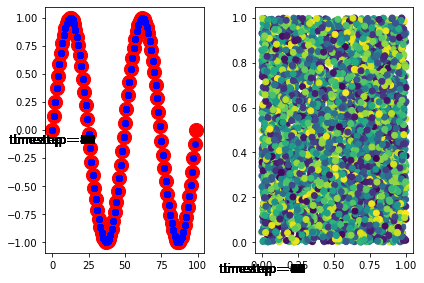

In [13]:
fig_scatter, plt_scatter = set_snapshots_for_anime((1,2),100, tight_layout = True)

In [14]:
# y = energy, としてもう一つはPD of each timestep, なのでPDをtimestep orderで並べたもの
def save_animation(fig, plt_array, interval = 500, filename = "sample.gif", writer = "imagemagick"):
    # アニメーション作成
    ani = animation.ArtistAnimation(fig, plt_array, interval)

    # 保存
    ani.save(filename, writer = writer)

In [17]:
save_animation(fig_scatter, plt_scatter, interval = 500, filename = "sample3.gif", writer = "imagemagick")